# **Laboratorio 4:**

Matrices, abrimos archivos con señales reales (audios, EEG, ECG, etc.), señales no estacionarias  DFT.N local y STFT



## Librerías necesarias

instalamos la librerías y sublibrerías necesarias para toda la notebook

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import signal #para convolución lineal
from scipy.fftpack import fft,fftshift,ifft #funciones p/trabajar con la Transf. de Fourier
from scipy.io.wavfile import read, write  #para leer, grabar archivos de audio formato wav

## Matrices en Python

La librería mas utilizada para el manejo de vectores y matrices en python se llama **numpy**


In [2]:
#Definimos una matriz (array 2D, con filas y columnas)
mat = np.array(([1,2,3],[4,5,6],[7,8,9],[10,11,12])) 
print(mat)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [3]:
matriz_ceros = np.zeros((3,2))
print(matriz_ceros)

matriz_unos = np.ones((2,4))
print(matriz_unos)

[[0. 0.]
 [0. 0.]
 [0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]


##### forma, tamaño, shape

In [4]:
#tamaños, dimensiones, forma, shape 
#array 2D, con filas y columnas 
print(mat.shape, '=(#filas, #cols), shape de matriz 4x3') 
print(matriz_ceros.shape,'shape de matriz 3x2')
print(matriz_unos.shape,'shape de matriz 2x4')

(4, 3) =(#filas, #cols), shape de matriz 4x3
(3, 2) shape de matriz 3x2
(2, 4) shape de matriz 2x4


In [5]:
#accedemos a las entradas de la matriz (arreglo 2D)
#con dos índices, uno para filas y otro para columnas
#el primer índice es el de la fila y los índices comienzan en 0
print(mat) #matriz completa 
print(mat[2,1]) #3era fila 2da columna, 

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
8


### Ejercicio 1
imprimir el valor de la matriz mat que está en el lugar inferior derecho, el que está en la esquina superior derecha

In [6]:
print(mat[0,0], "\n")
print(mat[3,2])

# ej. mostrar una fila de la matriz
print(mat[:,1]) # segunda fila

# TODO: revisar esto que no da (no entiendo como es esto)
print(mat[:,1:3]) # segunda fila item 1


1 

12
[ 2  5  8 11]
[[ 2  3]
 [ 5  6]
 [ 8  9]
 [11 12]]


elegimos filas y columnas

In [7]:
print(mat)
print(mat[2,:]) #tercera fila, o fila número 2, los índices empiezan en 0
ter_fila=mat[2,:]

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[7 8 9]


### Ejercicio 2 
mostrar el tamaño (dimensiones) de la matriz y la tercera fila  (ayuda: .shape)

In [8]:
print(mat.shape) #
print(mat[2,:].shape) #tercera columna

(4, 3)
(3,)


compararlo con la función len

In [9]:
print(len(mat[2,:]))

3


## Archivos en Colab:
clik en el lugar indicado con rojo en próxima imagen y luego buscan y seleccionan los archivos necesarios 


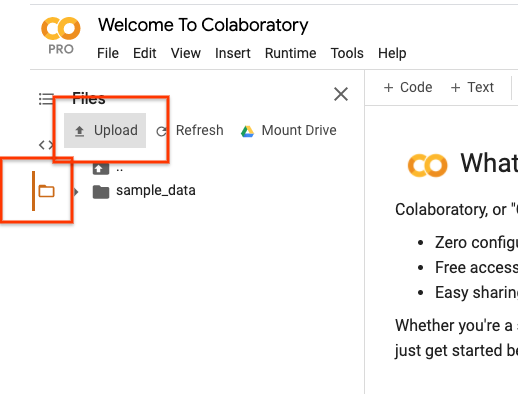

### Ejercicio 3: audio.wav 
a) escuche el archivo 'audiolab1.wav' sin reirse. ⛅ ⛱

b) Lleve a memoria la señal que se encuentra en el archivo 


In [10]:
# no se olvide de tener el archivo en la nube del colab siguiendo las instrucciones de arriba
au1=read('./audiosLAB4/audiolab1.wav')
print (au1) #dupla

(44100, array([[  1,   1],
       [  1,   1],
       [  1,   1],
       ...,
       [  3,   3],
       [ -8,  -8],
       [-13, -13]], dtype=int16))


Notar que al abrir el archivo nos encontramos con una dupla de datos. 
- En el primer lugar (au1[0]), nos encontramos con la frecuencia de muestreo en Hertz con que fue capturada la señal de audio
- En segundo lugar (au1[1]) con la señal en si, que según el aparato con que fue capturada la señal puede ser un vector (array 1D) o una matriz con dos columnas (sonido stereo, en general dos columnas iguales)

In [11]:
Fr1=au1[0] #frecuencia de muestreo (en Hertz) que tuvo la señal
print(Fr1, " frecuencia de muestreo")

44100  frecuencia de muestreo


In [12]:
au1[1] #señal de audio

array([[  1,   1],
       [  1,   1],
       [  1,   1],
       ...,
       [  3,   3],
       [ -8,  -8],
       [-13, -13]], dtype=int16)

In [13]:
print(au1[1].shape) #matriz de datos (vector en algunos aparatos)

(344053, 2)


vector de datos: [  1   1   1 ...   3  -8 -13]


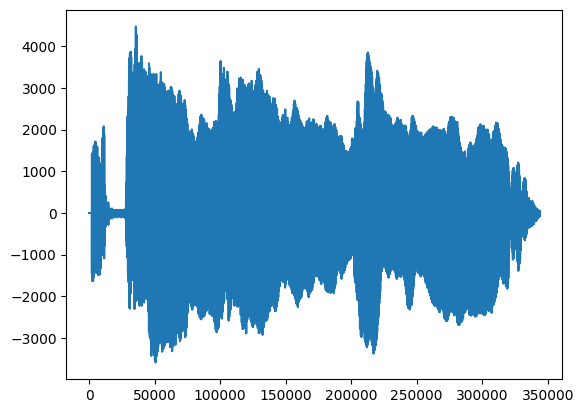

In [14]:
A1=au1[1][:,0] #vector de datos, arreglo numpy, elegimos la primer columna
print ('vector de datos:', A1)
plt.plot(A1)
plt.show()

c) Cuál fue la frecuencia de muestreo. Cual es la frecuencia de Nyquist del muestreo. Comente

d) calcule la cantidad de muestras que tiene la señal y el tiempo de duración


In [15]:
M=len(A1)
print('cantidad de muestras:', M)

cantidad de muestras: 344053


e) Genere el vector de tiempos discretizados y grafique la señal en función del tiempo

graficamos solo dos momentos de la señal (tipo zoom)

f) agregarle el tiempo a las gráficas

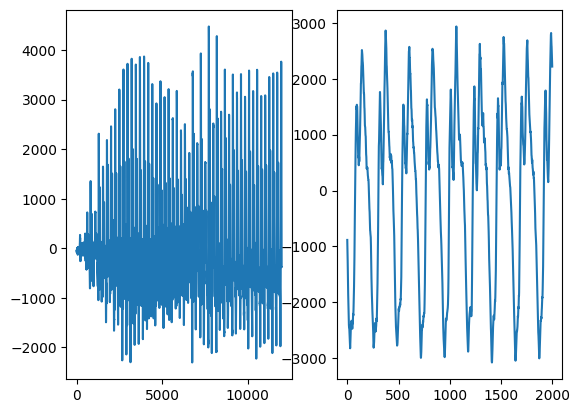

In [16]:
plt.subplot(121)
plt.plot(A1[28000:40000])
plt.subplot(122)
plt.plot(A1[68000:70000])

plt.show()


### Ejercicio 4: DFT 
a) Calcule su transformada de Fourier punto N, con N=M cantidad total de muestras, grafique y Analice los componentes de frecuencia. Están en Hertz? 

b) Analice los componentes de frecuencia de dos momentos diferentes de la señal (de un segundo cada uno) usando DFT.N con N=Fr1


In [17]:
N=Fr1 # N=Fr1 muestras es un segundo en este muestreo
print(N)

44100


In [18]:
DFT1=fft(A1,N) #trunca las primeras N muestras (el primer segundo de la señal)
#elegir otro momento de la señal:
inicio=200000 #se puede cambiar el inicio (como mucho debe valer M-N)
#t0=2 #tiempo inicial (en segundos), hay que tener cuidado con los inicios (deberia ser un multiplo de 1/Fr)
#t0=t[20000] #
#inicio=t0*Fr
n=inicio+np.arange(0,N)

### Ejercicio 5
Considera que la señal anterior es estacionaria? Debemos analizar la señal en diferentes momentos? Como haria este analisis de forma mas adecuada?

### Ventanas

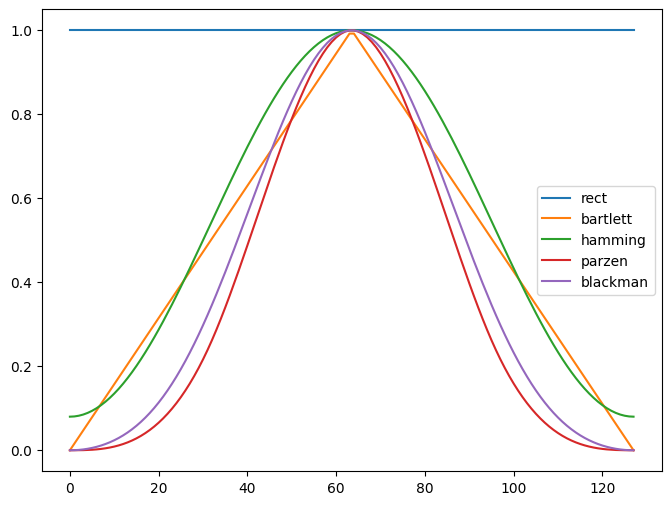

In [19]:
#from scipy import signal # https://docs.scipy.org/doc/scipy/reference/signal.windows.html
w1 = np.ones(128) #rectangular
w2 = signal.bartlett(128)
w3=  signal.hamming(128)
w4 = signal.parzen(128) #no la pedimos ..
w5 = signal.blackman(128)

m = np.arange(128) #para el eje de las abscisas, vector con nros de muestras

plt.figure(figsize=(8, 6))
plt.plot(m,w1,m,w2, m,w3, m,w4,m, w5)
plt.legend(('rect','bartlett','hamming','parzen', 'blackman'))
plt.show()


### Ejercicio (para la casa)
a) Lleve a memoria la señal que se encuentra en el archivo 'audio2.wav' (también puede hacerlo con el archivo 'audiolab2.wav' o con el que quieran grabar y guardar en formato wav)


In [20]:
au2=read('audio2.wav')
print (au2) #terna
A2=au2[1] #vector de datos, arreglo numpy
print (A2)

FileNotFoundError: [Errno 2] No such file or directory: 'audio2.wav'

**Notar las diferencias** con la señal anterior

In [ ]:
print('shape de la señal', A2.shape)
print('frec de muestreo: ', au2[0], ' Hertz, es decir ',  au2[0], ' muestras por segundo' )

longitud del vector 93120
frec de muestreo:  48000  Hertz, es decir  48000  muestras por segundo


Repetir el proceso que hicimos en los ej anteriores para la señal con la que esta trabajando

b) Cuál fue la frecuencia de muestreo. Cual es la frecuencia de Nyquist del muestreo. Comente

c) calcule la cantidad de muestras que tiene la señal y el tiempo de duración


d) Genere el vector de tiempos discretizados y grafique la señal en función del tiempo

e) grafique solo dos momentos de la señal (tipo zoom) en funcion del tiempo


f) Calcule su transformada de Fourier punto N, con N=?, grafique y Analice los componentes de frecuencia. Están en Hertz? 

g) Analice los componentes de frecuencia de dos segundos diferentes de la señal usando la DFT.N (con N la frecuencia de muestreo, cantidad de muestras en un segundo)
Considera que la señal es estacionaria?


h) Que tipo de analisis haria en este caso? 